In [1]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

many = len(gu_name)

In [2]:
# 구 별로 dataframe 불러오기
def get_dataframe(name):
    return pd.read_csv(f'../seoul_apt_trade_data/{name}_trade.csv', encoding = 'cp949')

In [5]:
import pandas as pd

gu_data = [get_dataframe(name) for name in gu_name]
price_data = []

for i in range(many):
    gu_data[i]['평당가격'] = gu_data[i]['거래금액']/gu_data[i]['전용면적']
    gu_data[i]['거래월'] = [date[:7] for date in gu_data[i]['거래일']]
    gu_data[i]['Unnamed: 0'] = 1
    price_data.append(gu_data[i].loc[:,['거래월','평당가격','Unnamed: 0']].groupby('거래월').sum())
    price_data[i]['평당가격'] = price_data[i]['평당가격']/price_data[i]['Unnamed: 0']

In [ ]:
print('강남의 m^2당 가격 및 거래량')
price_data[0]

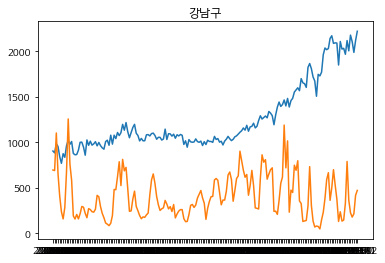

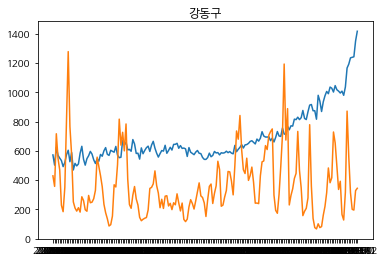

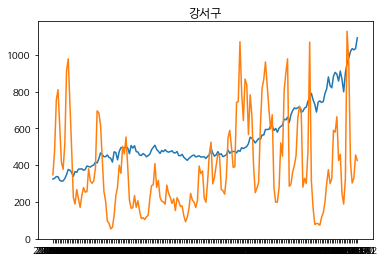

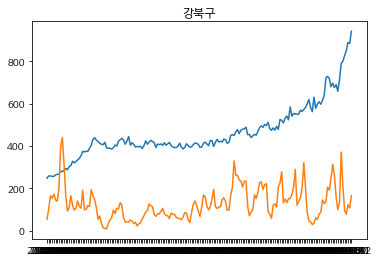

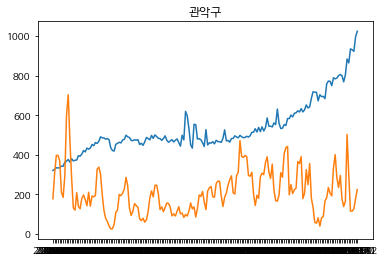

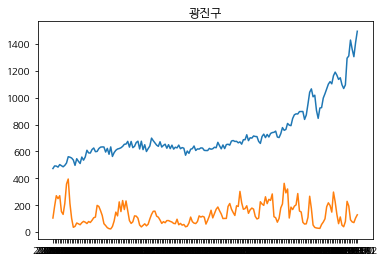

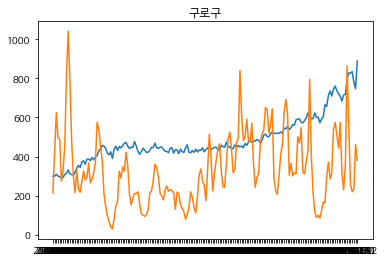

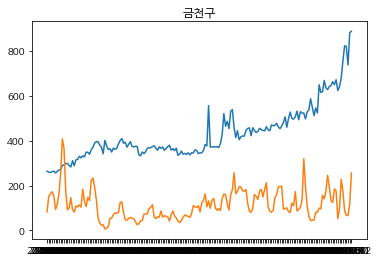

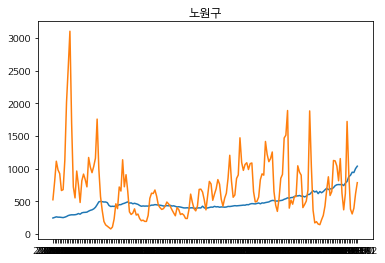

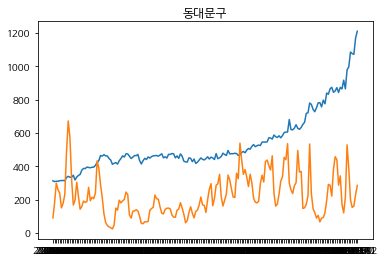

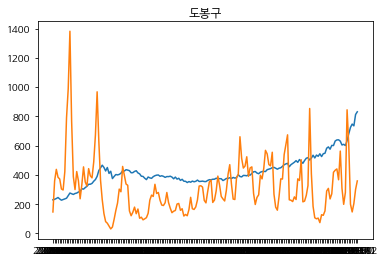

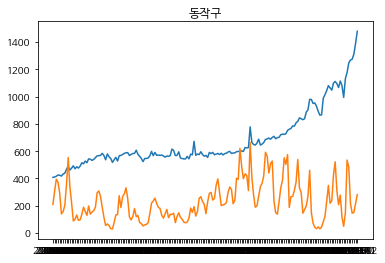

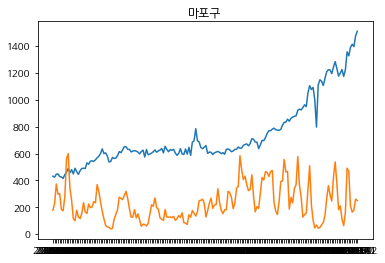

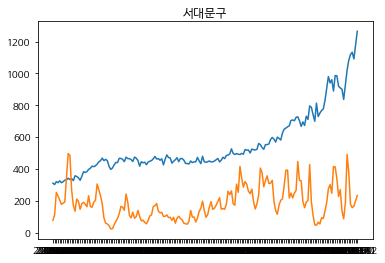

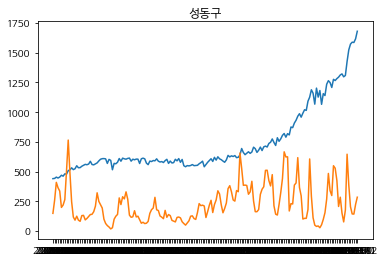

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

for i in range(24):
    plt.title(gu_name[i])
    plt.plot(price_data[i]['평당가격'])
    plt.plot(price_data[i]['Unnamed: 0'])
    plt.show()